In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Abrindo dados

In [2]:
#Dados observados
df_cor = pd.read_pickle('../dados_meteorologicos/dez2017_AR.pk')
df_inmet = pd.read_pickle('../dados_meteorologicos/dez2017_INMET.pk')
df_cor = df_cor.resample('H').mean()
Fundao = pd.read_pickle('../dados_meteorologicos/Hfree_ev1.pk1')
Fundao.temperatura = Fundao.temperatura.apply(lambda x: x -273.15)
Fundao.index =pd.DatetimeIndex(start = '2017-12-16 01:00:00',periods = len(Fundao),
                               freq = '5min')

/home/rafael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  


In [3]:
df_cor = df_cor.loc['2017-12-16 01:00:00':'2017-12-18 16:00:00']
df_inmet = df_inmet.loc['2017-12-16 01:00:00':'2017-12-18 16:00:00']

Fundao = Fundao.resample('H').mean()
Fundao = Fundao.temperatura.loc['2017-12-16 01:00:00':'2017-12-18 16:00:00']

observado = pd.concat([df_cor,df_inmet], axis=1)
observado['Fundao']=Fundao.values

In [4]:
observado.columns = ['RioCentro', 'AltoBV', 'Guaratiba', 'Iraja',
       'JardimB', 'SantaCruz', 'SaoCristovao', 'Marambaia', 'Xerem',
       'FCopacabana', 'Ecologia', 'Jacarepagua', 'Fundao']

In [5]:
observado = observado[['AltoBV', 'Fundao', 'Guaratiba', 'Iraja', 'JardimB', 'RioCentro',
       'SantaCruz', 'FCopacabana', 'Ecologia', 'Jacarepagua', 'Marambaia','SaoCristovao',
       'Xerem']]

In [6]:
observado.shape

(64, 13)

In [6]:
# abre arquivo txt gerado pelo grads
def load_output(arquiv):
    txt = open(arquiv,'r').readlines()
    array = np.array([txt[i].split() for i in range(len(txt))]).flatten()
    lista = []
    for i in range(len(array)):
        for x in range(len(array[i])):
            d = float(array[i][x])    
            lista.append(d)
    data= np.array(lista).ravel()
    return data 



In [7]:
# WRF/ucm
''' se no grads utilizar  

fprintf.gs t2 santa_cruz_wrf1.txt %g 1

use np.loadtxt, contrario load_output'''

altobv = np.loadtxt('../WRF/altodaboavista_wrf1.txt')
fundao = np.loadtxt('../WRF/fundao_wrf1.txt')
guaratiba = np.loadtxt('../WRF/guaratiba_wrf1.txt')
iraja = np.loadtxt('../WRF/iraja_wrf1.txt')
jardim = np.loadtxt('../WRF/jardim_botanico_wrf1.txt')
riocentro = np.loadtxt('../WRF/riocentro_wrf1.txt')
santacruz = np.loadtxt('../WRF/santa_cruz_wrf1.txt')
copacabana = load_output('../WRF/copacaba_wrf1.txt')
ecologia = load_output('../WRF/ecologia_wrf1.txt')
jacarepagua = load_output('../WRF/jacarepagua_wrf1.txt')
saocristovao = np.loadtxt('../WRF/saocristovao_wrf1.txt')
marambaia = load_output('../WRF/marambaia_wrf1.txt')
xerem = load_output('../WRF/xerem_wrf1.txt')

df_wrf = pd.DataFrame({'AltoBV':altobv,'Fundao':fundao,'Guaratiba':guaratiba,'Iraja':iraja,
                      'JardimB':jardim, 'RioCentro':riocentro,'SantaCruz':santacruz,
                      'FCopacabana':copacabana, 'Ecologia': ecologia, 'Jacarepagua':jacarepagua,
                      'Marambaia': marambaia,'SaoCristovao':saocristovao, 'Xerem': xerem})
df_wrf.index =pd.DatetimeIndex(start = '2017-12-15 21:00:00',
            periods = len(df_wrf),freq = '1H')
            
df_wrf = df_wrf.apply(lambda x: x - 273.15, axis =0 )



/home/rafael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.


In [8]:
''' se no grads utilizar  

fprintf.gs t2 santa_cruz_wrf1.txt %g 1

use np.loadtxt, contrario load_output'''

altobv = np.loadtxt('../WRF/wrf3/altodaboavista_wrf3.txt')
fundao = np.loadtxt('../WRF/wrf3/fundao_wrf3.txt')
guaratiba = np.loadtxt('../WRF/wrf3/guaratiba_wrf3.txt')
iraja = np.loadtxt('../WRF/wrf3/iraja_wrf3.txt')
jardim = np.loadtxt('../WRF/wrf3/jardimbotanico_wrf3.txt')
riocentro = np.loadtxt('../WRF/wrf3/riocentro_wrf3.txt')
santacruz = np.loadtxt('../WRF/wrf3/santacruz_wrf3.txt')
copacabana = np.loadtxt('../WRF/wrf3/copacabana_wrf3.txt')
ecologia = np.loadtxt('../WRF/wrf3/ecologia_wrf3.txt')
jacarepagua = np.loadtxt('../WRF/wrf3/jacarepagua_wrf3.txt')
saocristovao = np.loadtxt('../WRF/wrf3/saocristovao_wrf3.txt')
marambaia = np.loadtxt('../WRF/wrf3/marambaia_wrf3.txt')
xerem = np.loadtxt('../WRF/wrf3/xerem_wrf3.txt')

df_wrf3 = pd.DataFrame({'AltoBV':altobv,'Fundao':fundao,'Guaratiba':guaratiba,'Iraja':iraja,
                      'JardimB':jardim, 'RioCentro':riocentro,'SantaCruz':santacruz,
                      'FCopacabana':copacabana, 'Ecologia': ecologia, 'Jacarepagua':jacarepagua,
                      'Marambaia': marambaia,'SaoCristovao':saocristovao, 'Xerem': xerem})
                      
df_wrf3.index =pd.DatetimeIndex(start = '2017-12-15 21:00:00',periods = len(df_wrf3),
                                freq = '1H')

df_wrf3 = df_wrf3.apply(lambda x: x - 273.15, axis =0 )

/home/rafael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.


# Gráficos

## Totais

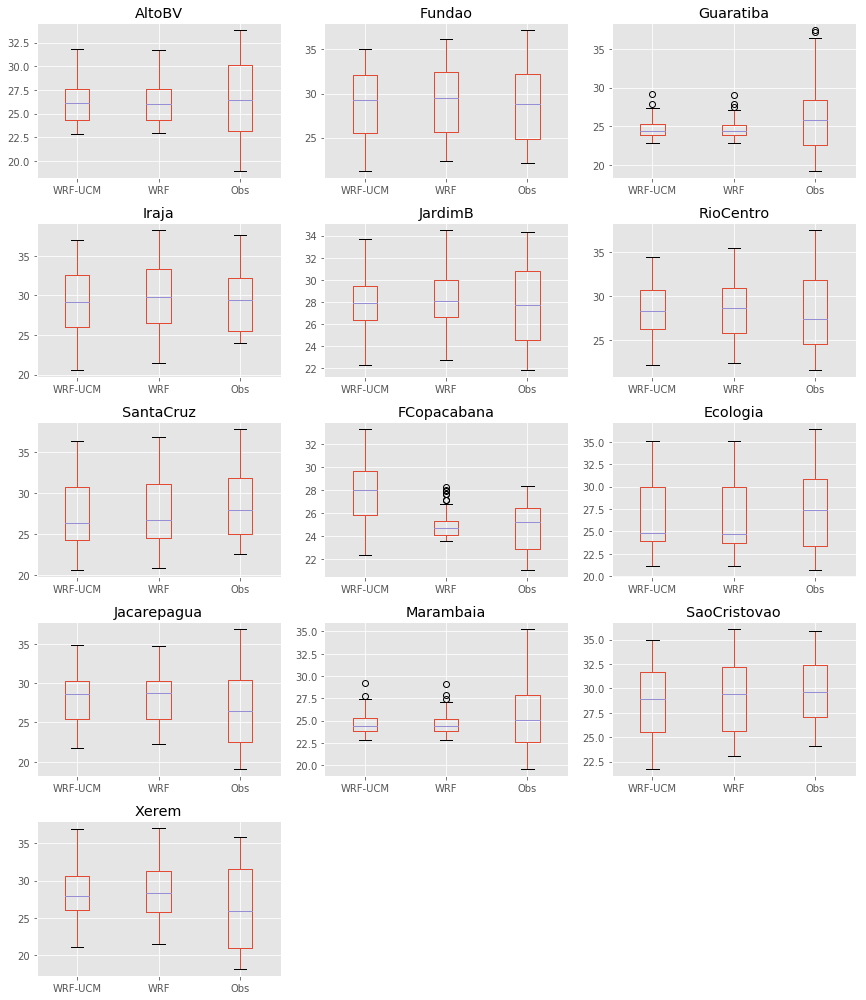

In [9]:
#Iraja = pd.concat([df_wrf.Iraja, df_wrf3.Iraja, observado.Iraja],axis=1)
#Iraja.plot.box()
plt.style.use('ggplot')
nomes = ['AltoBV', 'Fundao', 'Guaratiba', 'Iraja', 'JardimB', 'RioCentro',
       'SantaCruz', 'FCopacabana', 'Ecologia', 'Jacarepagua', 'Marambaia',
         'SaoCristovao','Xerem']
fig = plt.figure(figsize=(12,14))
for i in range(len(nomes)):
    sb = i+1
    
    Df = pd.concat([df_wrf[nomes[i]], df_wrf3[nomes[i]], observado[nomes[i]]],axis=1)
    Df.columns = ['WRF-UCM','WRF','Obs']
    ax = fig.add_subplot(5,3,sb)    
    Df.plot.box(ax=ax)
    plt.title(nomes[i])
    
plt.tight_layout()
#plt.savefig('../graficos/wrf_estacoes_boxplot.png',dpi=300)

In [10]:
import datetime

# create data
customdate = datetime.datetime(2017, 12, 17, 00, 00)
ytick = [ 2,4,6,8,10,12,14,16,18,20 ]
xtick = [customdate + datetime.timedelta(hours=i) for i in range(0,24,6)]

/home/rafael/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


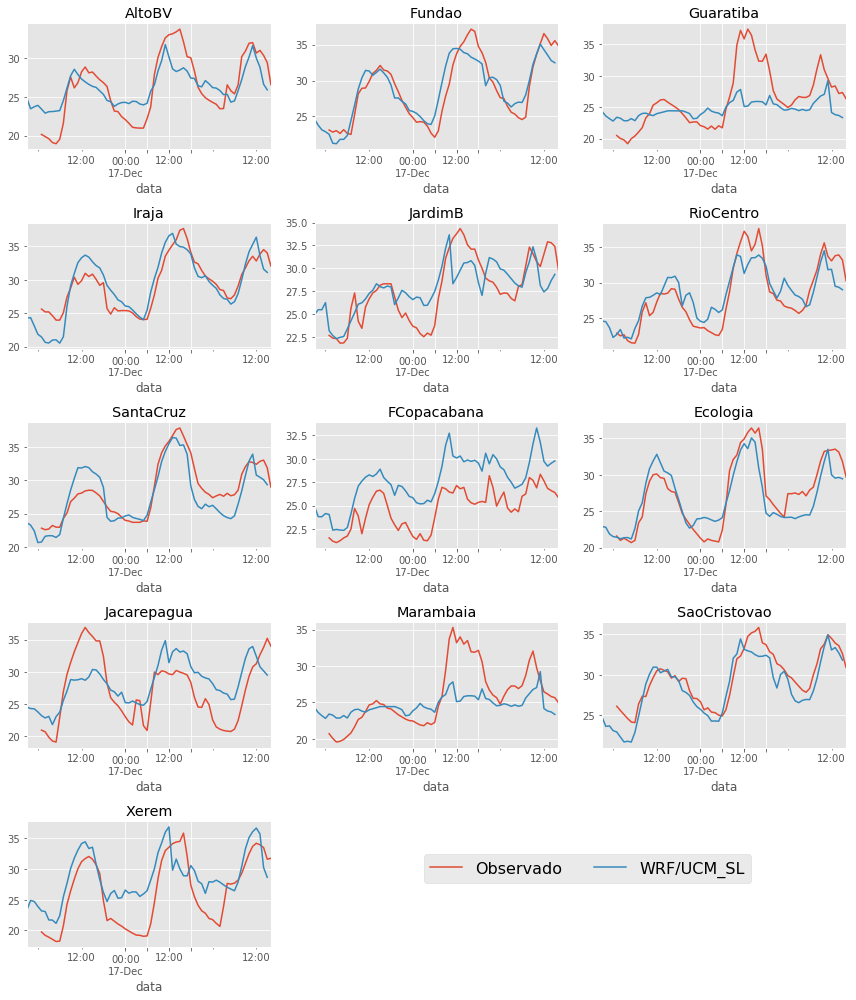

In [11]:
nomes = ['AltoBV', 'Fundao', 'Guaratiba', 'Iraja', 'JardimB', 'RioCentro',
       'SantaCruz', 'FCopacabana', 'Ecologia', 'Jacarepagua', 'Marambaia',
         'SaoCristovao','Xerem']

plt.style.use('ggplot')
l1 = 'WRF/UCM_SL'
l2 = 'WRF'
plt.figure(figsize=(12,14))

for i in range(len(nomes)):
    sb = i+1
    plt.subplot(5,3,sb)
    plt.title(nomes[i])
    observado[nomes[i]].plot(label='Observado')
    df_wrf[nomes[i]].plot(label=l1)
    plt.xticks(xtick)
    plt.grid()
    #df_wrf3[nomes[i]].plot(label=l2)
    
    plt.grid()
plt.tight_layout()
plt.legend(bbox_to_anchor=(3.0, 0.8),ncol=2,fontsize = 16)    
plt.tight_layout()

plt.savefig('../graficos/wrf_estacoes.png',dpi=300)

/home/rafael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'T estimada (ºC)')

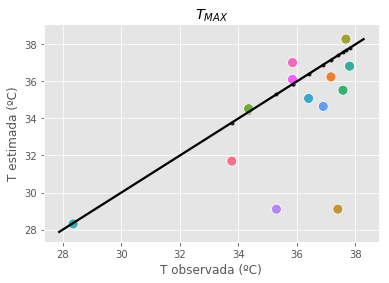

In [12]:
plt.title('$T_{MAX}$')
sns.regplot(x = observado.max().values, y = observado.max().values, 
            color = 'k', marker='.')
sns.scatterplot(x = observado.max().values, y = df_wrf3.max().values,
                hue=df_wrf.columns.values,legend = False,
               s=100)

plt.xlabel('T observada (ºC)')
plt.ylabel('T estimada (ºC)')

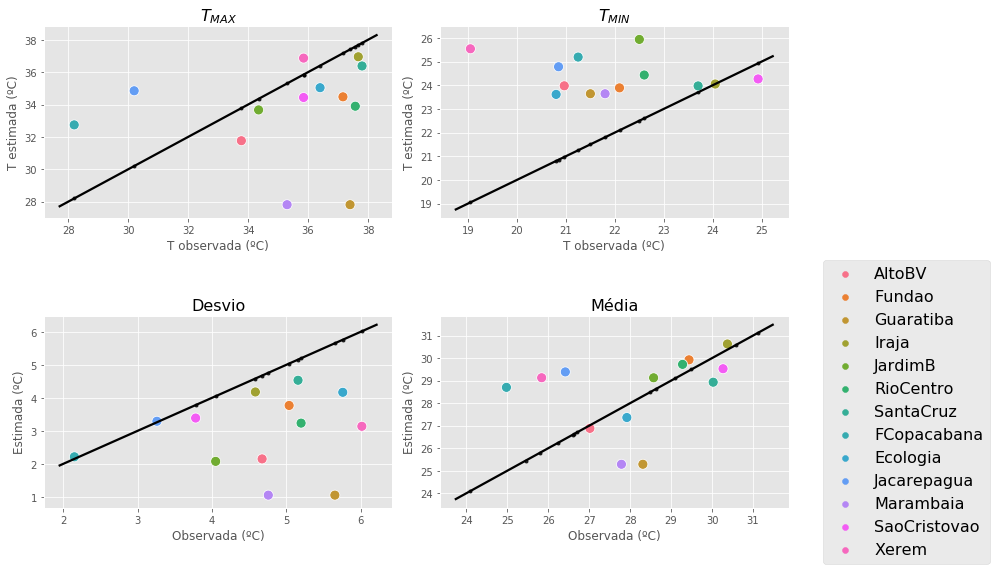

In [203]:
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
plt.title('$T_{MAX}$',fontsize = 16)
sns.regplot(x = observado.max().values, y = observado.max().values, 
            color = 'k', marker='.')
sns.scatterplot(x = observado.max().values, y = df_wrf.max().values,
                hue=df_wrf.columns.values,legend = False, s=100     )
plt.xlabel('T observada (ºC)')
plt.ylabel('T estimada (ºC)')


plt.subplot(2,2,2)
plt.title('$T_{MIN}$',fontsize = 16)
sns.regplot(x = observado.min().values, y = observado.min().values, 
            color = 'k', marker='.')
sns.scatterplot(x = observado.min().values, y = df_wrf.min().values,
                hue=df_wrf.columns.values,legend = False, s=100)
plt.xlabel('T observada (ºC)')
plt.ylabel('T estimada (ºC)')


plt.subplot(2,2,3)
plt.title('Desvio',fontsize = 16)
sns.regplot(x = observado.std().values, y = observado.std().values, 
            color = 'k', marker='.')
sns.scatterplot(x = observado.std().values, y = df_wrf.std().values,
                hue=df_wrf.columns.values,legend = False, s=100)
plt.xlabel('Observada (ºC)')
plt.ylabel('Estimada (ºC)')

plt.subplot(2,2,4)
plt.title('Média',fontsize = 16)
sns.regplot(x = observado.median().values, y = observado.median().values, 
            color = 'k', marker='.')
s= sns.scatterplot(x = observado.mean().values, y = df_wrf.mean().values,
                hue=df_wrf.columns.values, s=100
                )

plt.xlabel('Observada (ºC)')
plt.ylabel('Estimada (ºC)')
s.legend(loc='right', bbox_to_anchor=(1.6,0.5), ncol=1,fontsize = 16)

plt.tight_layout()

plt.savefig('../graficos/max_min_wrf_b.png')

# R2

In [15]:
# dia 17/12/2017
df_wrf = df_wrf.loc['2017-12-17 00:00:00':'2017-12-18 00:00:00']
df_wrf3 = df_wrf3.loc['2017-12-17 00:00:00':'2017-12-18 00:00:00']
observado = observado.loc['2017-12-17 00:00:00':'2017-12-18 00:00:00']

In [32]:
def r2(x,y):
    return (np.corrcoef(x,y)[0,1])**2

In [36]:
from sklearn.metrics import mean_squared_error, r2_score

In [55]:
names = ['AltoBV', 'Fundao', 'Guaratiba', 'Iraja', 'JardimB', 'RioCentro',
       'SantaCruz', 'FCopacabana', 'Ecologia', 'Jacarepagua', 'Marambaia',
       'SaoCristovao', 'Xerem']

r2_ucm = []
r2_mod = []
srmq = []
#r2_wrf = []

for i in names:
   # rWRF = r2(observado[i],df_wrf3[i])
    rUCM = r2(observado[i],df_wrf[i])
    rmod  = r2_score(observado[i],df_wrf[i])
    SRMQ = mean_squared_error(observado[i],df_wrf[i])
    #r2_wrf.append(rWRF)
    r2_ucm.append(rUCM)
    r2_mod.append(rmod)
    srmq.append(SRMQ)
                  

R2 = pd.DataFrame({'R2':r2_ucm, 'R2_mod':r2_mod, 'RMSE': np.sqrt(srmq)},index=names)   


In [76]:
R2

,R2,R2_mod,RMSE
AltoBV,0.854218,0.637854,2.755826
Fundao,0.777818,0.750211,2.466561
Guaratiba,0.561502,-0.053414,5.683585
Iraja,0.886452,0.882403,1.539949
JardimB,0.475692,0.424843,3.009006
RioCentro,0.852450,0.754206,2.524847
SantaCruz,0.900387,0.848291,1.967897
FCopacabana,0.760332,-2.385274,3.876672
Ecologia,0.852237,0.802685,2.506052
Jacarepagua,0.744473,-0.141702,3.412527


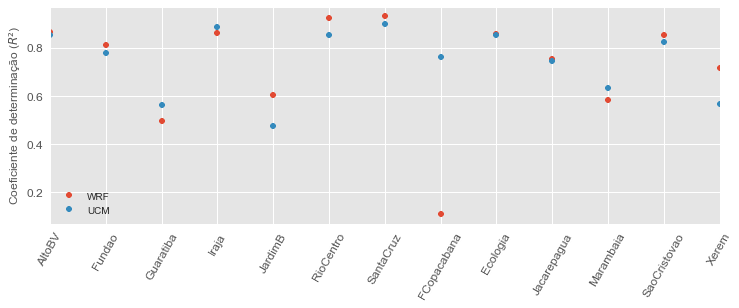

In [251]:
plt.style.use('ggplot')
R2.plot(style = '8',fontsize = 12, figsize = (12,4))
plt.xticks(range(R2.shape[0]),R2.index,rotation=60)
#plt.xlabel('Estações')
plt.ylabel('Coeficiente de determinação ($R²$)')
plt.tight_layout
plt.savefig('../graficos/r2_WRFs.png')

# H 

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
Fundao = pd.read_pickle('../dados_meteorologicos/Hfree_ev1.pk1')
Fundao.temperatura = Fundao.temperatura.apply(lambda x: x -273.15)
Fundao.index =pd.DatetimeIndex(start = '2017-12-16 01:00:00',periods = len(Fundao),
                               freq = '5min')

/home/rafael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  after removing the cwd from sys.path.


In [14]:
wrf_H = np.loadtxt('../WRF/fundao_h_wrf1.txt')
wrf2_H = np.loadtxt('../WRF/fundao_h_wrf2.txt')
wrf3_H = np.loadtxt('../WRF/wrf3/fundao_h_wrf3.txt')

In [15]:
H_wrf = pd.DataFrame({'wrf1':wrf_H, 'wrf2':wrf2_H, 'wrf3':wrf3_H})
H_wrf.index =pd.DatetimeIndex(start = '2017-12-15 21:00:00',periods = len(wrf_H),freq = '1H')

/home/rafael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  


In [16]:
H_wrf = H_wrf.loc['2017-12-16 01:00:00':'2017-12-18 15:00:00']

In [17]:
Fundao_H = Fundao.loc['2017-12-16 00:00:00':'2017-12-18 15:00:00']
Fundao_H = Fundao_H.resample('H').mean()

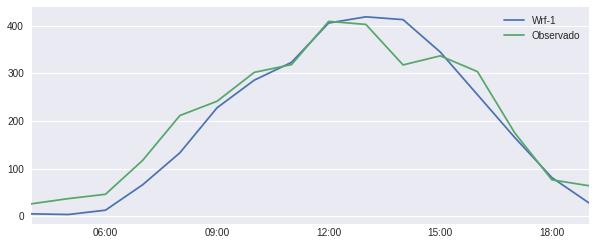

In [20]:
plt.style.use('seaborn')
plt.figure(figsize=(10,4))
H_wrf.wrf1.plot(label ='Wrf-1')
#H_wrf.wrf2.plot(label ='Wrf-2')
#H_wrf.wrf3.plot(label ='Wrf-3')
Fundao_H.H.plot(label = 'Observado')
plt.legend()

In [19]:
H_wrf = H_wrf.loc['2017-12-17 04:00:00': '2017-12-17 19:00:00']
Fundao_H = Fundao_H.loc['2017-12-17 04:00:00': '2017-12-17 19:00:00']

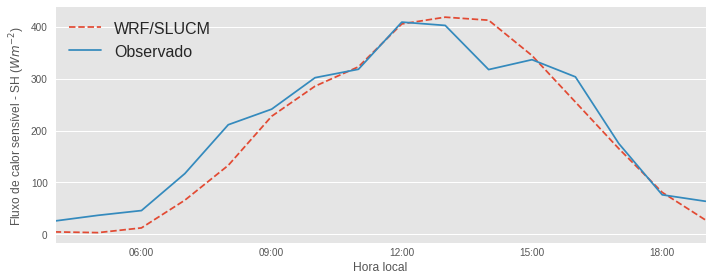

In [21]:
plt.style.use('ggplot')
plt.figure(figsize=(10,4))
H_wrf.wrf1.plot(label ='WRF/SLUCM',style ='--')
#H_wrf.wrf2.plot(label ='Wrf-2')
#H_wrf.wrf3.plot(label ='Wrf-3')
Fundao_H.H.plot(label = 'Observado',style='-')
plt.ylabel('Fluxo de calor sensível - SH ($Wm^{-2}}$)')
plt.xlabel('Hora local')
plt.grid(b=True)
plt.legend(fontsize = 16)
plt.tight_layout()
#plt.savefig('../graficos/H_17122017.png')

/home/rafael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'SH ($W/m^2$) WRF/SLUCM')

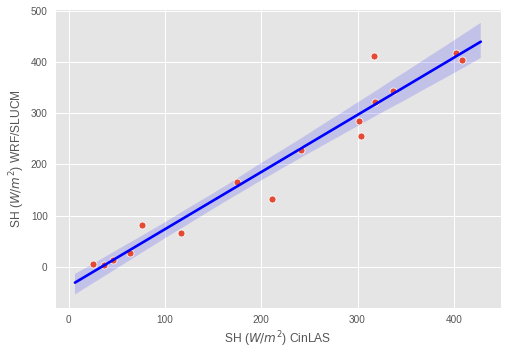

In [22]:
sns.regplot(Fundao_H.H.values,H_wrf.wrf1.values, color = 'b',  
           marker = '.')
p = sns.scatterplot(Fundao_H.H.values,H_wrf.wrf1.values)
plt.xlabel('SH ($W/m^2$) CinLAS')
plt.ylabel('SH ($W/m^2$) WRF/SLUCM')

#plt.savefig('../graficos/H_scater.png')

In [23]:
np.polyfit(Fundao_H.H.values,H_wrf.wrf1.values,1)

array([  1.1194423 , -38.78854831])

In [26]:
np.sqrt(mean_squared_error(Fundao_H.H,H_wrf.wrf1))

39.559707180437925

In [348]:
(np.corrcoef(Fundao_H.H,H_wrf.wrf1))**2

array([[ 1.        ,  0.94964817],
       [ 0.94964817,  1.        ]])

In [28]:
from scipy import stats

In [29]:
slope, intercept, r_value, p_value, std_err = stats.linregress(Fundao_H.H.values,
                                                               H_wrf.wrf1.values)

In [30]:
r_value**2

0.9496481699018053

In [325]:
p_value

1.7580199983640916e-10

In [31]:
desc_obs = pd.DataFrame({'max': observado.max().values,
                         'min':observado.min().values,
                        'std':observado.std().values,
                        'mean':observado.mean().values})

desc_wrf = pd.DataFrame({'max':  df_wrf.max().values,
                         'min': df_wrf.min().values,
                        'std': df_wrf.std().values,
                        'mean':  df_wrf.mean().values,})


In [32]:
prt = [ 'max','min','std','mean']
sl =[]
it = []
r_v = []

for i in range(len(prt)):
    slope, intercept, r_value, p_value, std_err = stats.linregress(desc_obs[prt[i]],
                                                                   desc_wrf[prt[i]])
    
    sl.append(slope)
    it.append(intercept)
    r_v.append(r_value**2)
    
desc = pd.DataFrame({'slope': sl,'intercept':it, 'r2':r_v},index=prt)

In [33]:
desc

,slope,intercept,r2
max,0.246124,25.186140,0.061105
min,-0.212325,26.262308,0.252564
std,0.204642,2.278686,0.026578
mean,0.561290,12.015590,0.323743
